In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip as qt
import scipy as sc
import pickle
mpl.rcParams.update({'font.size':22})

# Progress bar yay
from ipywidgets import FloatProgress

# Physical Constants
phi0 = 2.067833831e-15
hbar = 1.054571800e-34
e = 1.6021766208e-19

### Bloch's Phenomenological Model of Spin Relaxation

#### Background

The model has its roots in describing the problem of a nuclear free spin in a uniform magnetic field. The equation of motion of the magnetic moment in a uniform homogeneous magnetic field is

$$\frac{d \vec{M}}{dt} = \gamma \vec{M} \times \vec{H} $$

where $\vec{M}$ is the magnetisation vector, $\vec{H}$ is the magnetic field vector and $\gamma$ the gyromagnetic ratio. In a frame rotating with angular velocity $\vec{\omega}$, the equation becomes

$$\frac{\partial \vec{M}}{\partial t} = \gamma \vec{M} \times \left( \vec{H} + \frac{\vec{\omega}}{\gamma} \right)$$

where the field can now be treated as an effective field in the rotating frame:

$$\vec{H_e} = \vec{H} + \frac{\vec{\omega}}{\gamma}$$

Choosing the rotating frame such that $\vec{\omega} = - \gamma \vec{H_0}$ where $\vec{H_0}$ is a static field, then we see the effective field vanishes and

$$\frac{\partial \vec{M}}{\partial t} = 0$$

which in the laboratory frame means the magnetisation oscillates perpendicular to the field at a rate $\omega_0 = \left| \vec{\omega} \right|$ where $\omega_0$ is the Larmour frequency.

Now if an oscillating field $\vec{H_1}$ is superposed with the static one, represented as two fields rotating counter to each other, the rotating frame can be chosen aligned along the rotating fields such that one of the fields appears static:

$$\vec{H_e} = \left(H_0 + \frac{\omega}{\gamma}\right) \hat{z} + H_1 \hat{x}$$

where $\hat{x}$ and $\hat{z}$ are unit vectors of the rotating frame. The counter rotating field will appear to be rotating at $2\omega$ in this frame. One can then look at the angle $\theta$ between the effective and static applied fields. Writing $\omega_1 = - \gamma H_1$, one can find

$$\tan \theta = \frac{\omega_1}{\omega_0 - \omega}$$

Then going back to the laboratory frame, given suitable initial conditions, the angle between the magnetisation and the applied field will evolve in time as

$$\cos \alpha = 1 - 2\sin^2 \theta \sin^2 \frac{1}{2} a t$$

where

$$a = -\sqrt{\left(\omega_0 - \omega\right)^2 + \omega_1^2}$$

is related to the magnitude of the effective field through $a = -\gamma H_e$. One can see that $\alpha$ and $\theta$ will become very large when $\omega$ approaches $\omega_0$, which is a form of resonance. Therefore a small RF field compared to the applied field can significantly change the magnetisation vector when the RF frequency is close to the Larmour frequency of the applied static field. Furthermore the effect of the counter-rotating field is to induce new resonances and shifts in the apparent Larmour frequency.

A quantum mechanical treatment of this problem leads to the Rabi equation for the excited state probability

$$p_{-} = \frac{1}{2}\left( 1 - \cos \alpha \right) = \sin^2 \theta \sin^2 \frac{1}{2}a t$$

which shows that the excited state probability oscillates at a rate associated with the amplitude of the RF field.

#### The Model

Bloch's model makes the following phenomenogical arguments relevant to qubits emulating single spins. The evolution of the magnetisation towards it's equilibrium value $M_0$ in a static field is described by a time constant $T_1$ and follows first order dynamics. If the static field is along $\hat{z}$:

$$\frac{d M_z}{d t} = -\frac{M_z - M_0}{T_1}$$

where $T_1$ is therefore the longitudinal relaxation time.

Now if the magnetisation is momentarily given a component not along $\hat{z}$, those components will decay at a rate associated with the transverse relaxation time $T_2$:

$$\frac{d M_{x,y}}{d t} = -\frac{M_{x,y}}{T_2}$$

Finally it is assumed that the RF field $H_1$ is much smaller than that of the static field $H_0$, so that the motion due to relaxation can be superposed with the motion of the spins, which in the rotating frame $\vec{\omega}$ is:

$$\frac{d \vec{M}}{d t} = \gamma \vec{M} \times \vec{H_e} - \frac{M'_x \hat{x} + M'_y \hat{y}}{T_2} - \frac{M_z - M_0}{T_1} \hat{z}$$

where $M'_x$ and $M'_y$ are the magnetisation components in the rotating frame. The effective field, following from before, can be written as

$$\vec{H_e} = \frac{\Delta \omega \hat{z} - \omega_1 \hat{x}}{\gamma}$$

where $\Delta \omega = \omega_0 - \omega$ is the detuning from the Larmour frequency. These equation lead to a set of differencial equations that describe the dynamics of the magnetisation vector. The types of solutions we are interested in depend on the details of the measurement protocol. In a continuous-wave two tone measurement, we are interested in stead state solutions, where the magnetisation vector is not changing in time in the rotating frame, i.e. the transient effects have vanished.

#### Relation to Circuit QED

If we start from the Rabi model for a two-level atom coupled to an RF cavity

$$\hat{H}_\mathrm{Rabi} = \frac{\hbar}{2} \omega_q \hat{\sigma}_z + \hbar\omega_r\hat{a}^\dagger \hat{a} + \hbar g \hat{\sigma}_x \left(\hat{a} + \hat{a}^\dagger \right)$$

where $g$ is the coupling strength, we can relate the magnetisation to the Pauli matrices in the case of spin-half particles using

$$\vec{M} = \frac{1}{2} \hbar\gamma \vec{\sigma}$$

where $\vec{\sigma}$ is the Pauli vector. The Hamiltonian for a spin interacting with an external field is then

$$\hat{H}_\mathrm{Spin} = \vec{H}\cdot \vec{M} = \frac{1}{2} \hbar \gamma \vec{H}\cdot\vec{\sigma} = \frac{1}{2} \hbar \gamma \left( H_x \hat{\sigma}_x + H_y \hat{\sigma}_y + H_z \hat{\sigma}_z \right) $$

so we see that the qubit frequency is simply $\omega_q = \gamma H_z$ and the transverse field due to coupling to the resonator is $g = \frac{1}{2} \gamma H_x$.

If we now look at the steady-state solutions of the Bloch equations, we can incorporate the phenomenological relaxation to the probabilities of obtaining certain spin states. Since we are interested in knowing the populations of up and down states of the $\hat{\sigma}_z$ operator, we can consider the z component of the magnetisation in the rotating frame and look at the steady state solutions:

$$\frac{d M'_z}{d t} = \omega_1 M'_y - \frac{M_z - M_0}{T1} = 0$$

The z component of the magnetisation can be related to the probabilities of finding up and down states by saying that an effective z magnetisation would be observed depending on those probabilies such that

$$M_z = \frac{1}{2} \gamma \hbar \left( p_+ - p_- \right)$$

where $p_+$ is the probability of finding the ground state. The steady state solution for $M'_y$ in the rotating frame is

$$M'_y = -\frac{\omega_1 T_2}{1 + (T_2 \Delta\omega)^2 + \omega_1^2 T_1 T_2} M_0$$

Using these equations and the fact that $p_+ + p_- = 1$, the excited state probability can be expressed as

$$p_- = -\omega_1 T_1 \frac{M'_y}{2M_0}$$

By rotating the rotating frame by 90 degrees, one sees that $M'_x$ and $M'_y$ are equivalent so that this result can be directly related to the two-tone spectroscopy result.

Now looking at the Rabi Hamiltonian, one can see that the transverse part of the field energy is $\gamma H_x = 2g$. However since the origin of the transverse field is the coupling to a resonator driven far away from resonance, its power should be proportional to the average number of 'spectroscopy' photons $n_s$. Thus we can write the driving field amplitude as

$$\gamma H_1 = \sqrt{n_s} 2g = \sqrt{n_s} \omega_\mathrm{Rabi}$$

Finally, the static field is the qubit energy, which is seen using previous expressions

$$\omega_q = \gamma H_z = \gamma \frac{\omega_0}{\gamma}$$

which leads to the expression obtained by [D. Schuster *et al.*][1]:

$$p_- = 1 - p_+ = \frac{1}{2} \frac{n_s \omega_\mathrm{Rabi}^2 T_1 T_2}{1 + (T_2 \Delta\omega)^2 + n_s \omega_\mathrm{Rabi}^2 T_1 T_2}$$

which also defines the spectral lineshape of the qubit resonance. The detuning term is then defined as $\Delta\omega = \omega_q - \omega_s$ where $\omega_s$ is the drive signal or spectroscopy probe frequency.

### Drive Power Dependence

We can look at the effect of drive power through $n_s$, of the excited state population in the steady state (continuous wave):

[1]: https://arxiv.org/abs/cond-mat/0408367

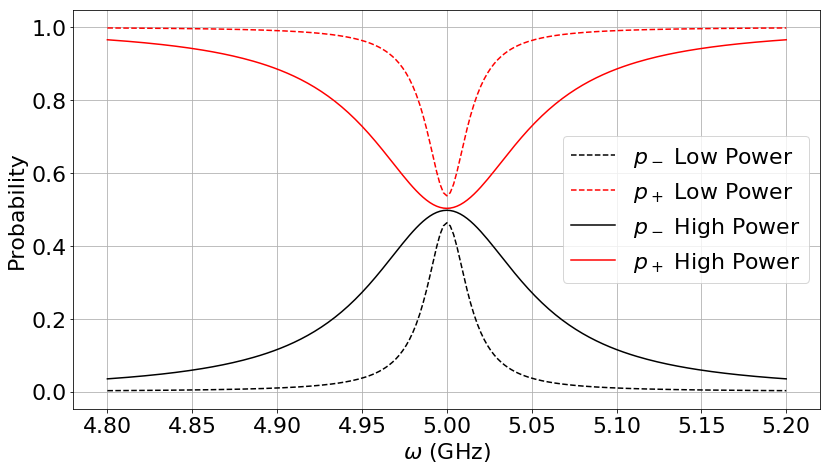

In [11]:
def pminus(w,params):
    ns = params["ns"]
    wrabi = params["wrabi"]
    T1 = params["T1"]
    T2 = params["T2"]
    wq = params["wq"]
    delw = wq-w
    return 0.5*ns*wrabi**2*T1*T2/(1 + T2**2*delw**2 + ns*wrabi**2*T1*T2)

def pplus(w,params):
    return 1 - pminus(w,params)

wpts = np.linspace(4.8,5.2,201)
params = {
    "ns":0.01,
    "wrabi":0.1,
    "T1":500,
    "T2":250,
    "wq":5.0
}

# Low power result
pmpts1 = pminus(wpts,params)
pppts1 = pplus(wpts,params)

# High power result
params["ns"] = 0.15
pmpts2 = pminus(wpts,params)
pppts2 = pplus(wpts,params)

fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(111)
ax1.plot(wpts, pmpts1,"k--",label="$p_-$ Low Power")
ax1.plot(wpts, pppts1,"r--",label="$p_+$ Low Power")
ax1.plot(wpts, pmpts2,"k-",label="$p_-$ High Power")
ax1.plot(wpts, pppts2,"r-",label="$p_+$ High Power")
ax1.set_xlabel('$\omega$ (GHz)')
ax1.set_ylabel('Probability')
ax1.grid()
ax1.legend()
fig.tight_layout()

### Dependence on Relaxation Times

Now looking at the same powers but at longer relaxation times:

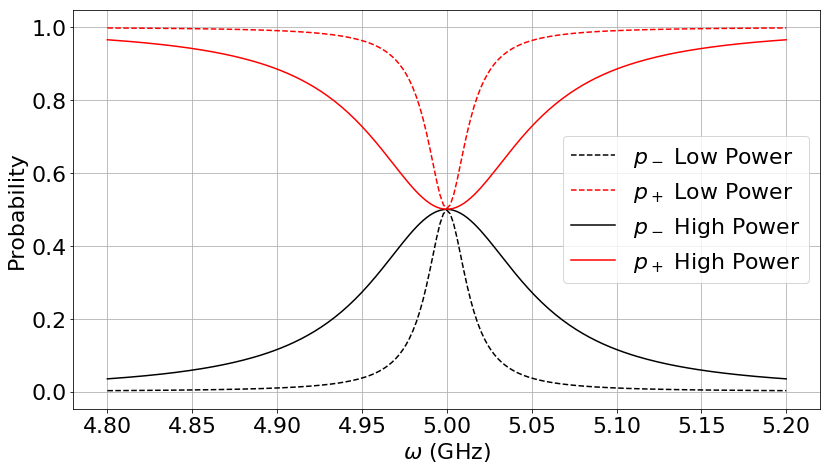

In [13]:
def pminus(w,params):
    ns = params["ns"]
    wrabi = params["wrabi"]
    T1 = params["T1"]
    T2 = params["T2"]
    wq = params["wq"]
    delw = wq-w
    return 0.5*ns*wrabi**2*T1*T2/(1 + T2**2*delw**2 + ns*wrabi**2*T1*T2)

def pplus(w,params):
    return 1 - pminus(w,params)

wpts = np.linspace(4.8,5.2,201)
params = {
    "ns":0.01,
    "wrabi":0.1,
    "T1":2000,
    "T2":1000,
    "wq":5.0
}

# Low power result
pmpts1 = pminus(wpts,params)
pppts1 = pplus(wpts,params)

# High power result
params["ns"] = 0.15
pmpts2 = pminus(wpts,params)
pppts2 = pplus(wpts,params)

fig = plt.figure(figsize=(12,7))
ax1 = plt.subplot(111)
ax1.plot(wpts, pmpts1,"k--",label="$p_-$ Low Power")
ax1.plot(wpts, pppts1,"r--",label="$p_+$ Low Power")
ax1.plot(wpts, pmpts2,"k-",label="$p_-$ High Power")
ax1.plot(wpts, pppts2,"r-",label="$p_+$ High Power")
ax1.set_xlabel('$\omega$ (GHz)')
ax1.set_ylabel('Probability')
ax1.grid()
ax1.legend()
fig.tight_layout()

We see that the linewidth is really only determined by the spectroscopy power, whereas the saturation to maximum excited state probability is determined by both the spectroscopy power and the relaxation times. From this we can see that for qubits with short relaxation times, the amplitude of the shifted cavity could be very small at low powers.